In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import os

import imagenet_utils
import anchors

import shutil
import urllib2

import parsers
import random

In [2]:
class_ids = ["n07739125", "n07767847"]
images_folder      = "images"
annotations_folder = "annotations"

params = {'images':True, 'boxes':True, 'set_name':True}

In [3]:
loader = imagenet_utils.ImageNetLoader()

In [5]:
classes = loader.download(class_ids, folder='data', params=params)
print (classes)

In [6]:
current_dir = os.path.join(os.path.abspath('.'), 'data/images')
labels = os.listdir(current_dir)
print (labels)

['apple', 'pear']


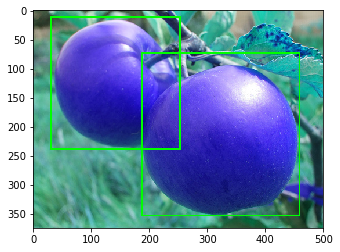

In [7]:
img = imagenet_utils.visualize_data('apple', folder='data', filename='n07739125_12')
if img is not None:
    plt.imshow(img)
    plt.show()

In [8]:
imagenet_utils.split_all(labels, folder='data', out_folder='data/split' )

Processing apple...
Images splitted to train(255), test(64)
Created directory /home/taras/coder/python/projects_upwork/Fruit recognition/data/split/train/annotations
Saved 255 files to /home/taras/coder/python/projects_upwork/Fruit recognition/data/split/train/annotations
Created directory /home/taras/coder/python/projects_upwork/Fruit recognition/data/split/test/annotations
Saved 64 files to /home/taras/coder/python/projects_upwork/Fruit recognition/data/split/test/annotations
Created directory /home/taras/coder/python/projects_upwork/Fruit recognition/data/split/train/images
Saved 255 files to /home/taras/coder/python/projects_upwork/Fruit recognition/data/split/train/images
Created directory /home/taras/coder/python/projects_upwork/Fruit recognition/data/split/test/images
Saved 64 files to /home/taras/coder/python/projects_upwork/Fruit recognition/data/split/test/images
Processing pear...
Images splitted to train(80), test(20)
Saved 80 files to /home/taras/coder/python/projects_upwo

Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_15996.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_5252.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_4013.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_7234.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_9009.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_3928.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_11967.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_10944.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_577.jpg
Not exists /home/taras/coder/python/projects

Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_7220.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_10428.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_1168.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_8870.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_856.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_7700.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_8592.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_3323.jpg
Not exists /home/taras/coder/python/projects_upwork/Fruit recognition/data/images/pear/n07739125_12270.jpg
Not exists /home/taras/coder/python/projects_

In [3]:
folder = os.path.join(os.path.abspath('.'), 'data/split/train/annotations')
centroids = anchors.calculate(folder)

('Found {0} bounding boxes', 467)
Iteration 1 : difference = 100000.0
Iteration 2 : difference = 1
Iteration 3 : difference = 0
Iterations took = 3
[[230 232]
 [168  83]
 [194 235]
 [291 175]
 [316 146]]


In [5]:
normalized = anchors.normalize(centroids, (416, 416), (13, 13))
print (normalized)

[7.1875, 7.25, 5.25, 2.59375, 6.0625, 7.34375, 9.09375, 5.46875, 9.875, 4.5625]


In [13]:
anns = [imagenet_utils.get_filename(fl) for fl in parsers.list_files(folder, '.xml')]

In [15]:
folder2 = os.path.join(os.path.abspath('.'), 'data/split/train/images')
imgs = [imagenet_utils.get_filename(fl) for fl in parsers.list_files(folder2, '.jpg')]

In [16]:
print (anns[0])
print (imgs[0])

n07767847_1160
n07739125_1180


In [17]:
cnt = 0
for i in anns:
    for j in imgs:
        if i == j:
            cnt += 1
            break
            
print (cnt, len(imgs))
            

(335, 335)


In [6]:
folder = os.path.join(os.path.abspath('.'), 'data/split/test/annotations')
anns = parsers.list_files(folder, '.xml')
parsers.set_object_name(anns,'' )

Changed object names 84


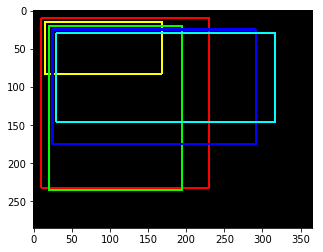

In [4]:
img = anchors.draw_anchors(centroids)
plt.imshow(img)
plt.show()

Test API

In [ ]:
loader.download(apples_wnid, folder='data')

In [4]:
loader.download_images(apples_wnid, folder='data', class_name='apple')

In [3]:
maps = loader.download_mappings(apples_wnid)

print (maps.values())

In [4]:
loader.download_annotations(apples_wnid, 'data/annotations', labels[0], force=True)

Created directory /home/taras/coder/python/projects_upwork/Fruit recognition/data/annotations
Created directory /home/taras/coder/python/projects_upwork/Fruit recognition/data/annotations/temp
Downloading: http://www.image-net.org/downloads/bbox/bbox/n07739125.tar.gz Bytes: 16835
Extracted to folder /home/taras/coder/python/projects_upwork/Fruit recognition/data/annotations
Download box annotation from http://www.image-net.org/downloads/bbox/bbox/n07739125.tar.gz to /home/taras/coder/python/projects_upwork/Fruit recognition/data/annotations/apple
